**Spotify Music Data(Spotify sequential skip prediction challange)**

Spotify is an online music service with over 190 million active users interacting with a library over 40 million tracks.Main Goal is to Predict the likelihood of a user skippng any given song during a listening session.


In [63]:
#Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the data set and merging three csv files

df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Track_Features/tf_000000000001.csv', '/content/drive/MyDrive/Track_Features/tf_mini.csv.gz','/content/drive/MyDrive/Track_Features/tf_000000000000.csv']), ignore_index=True)
print(df)

                                       track_id  ...  acoustic_vector_7
0        t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8  ...          -0.757088
1        t_65d18266-940a-4f27-9df5-fc9fee10b406  ...          -0.648822
2        t_59ef344c-10bc-415e-8a80-f97b46ee8bc8  ...          -0.722556
3        t_ba702bde-7de3-418f-95f6-5c1af618e28c  ...          -0.093790
4        t_96e1843d-312b-476d-9e31-ebb14bc478ff  ...           0.341655
...                                         ...  ...                ...
3757087  t_6a2bbc56-4d97-4c79-8f36-662499eac230  ...           0.256306
3757088  t_43db7bac-fc37-4327-aac5-501acd14fd74  ...           0.026608
3757089  t_098559b2-9973-444a-808a-ec51be32e887  ...          -0.390708
3757090  t_e25ff72d-e062-43cb-a112-00d3b570a0c9  ...          -0.115108
3757091  t_e24c6510-161c-4440-9b80-a92368834d9a  ...          -0.150678

[3757092 rows x 30 columns]


In [4]:
#Print first 5 raws of the data set
df.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,major,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,major,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,major,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,major,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,major,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


In [5]:
#print last 5 raws of the dataset
df.tail(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
3757087,t_6a2bbc56-4d97-4c79-8f36-662499eac230,186.894104,2018,94.503844,0.005289,0.466386,0.446391,0.359531,6.931908,0.602030,1.022817,2.929182e-01,11,0.121873,-9.070,0.388679,minor,0.432285,0.100813,85.045998,4,0.496875,-0.626732,0.225907,0.153023,0.063408,-0.366663,-0.011826,-0.289035,0.256306
3757088,t_43db7bac-fc37-4327-aac5-501acd14fd74,181.083450,2018,97.899482,0.977857,0.343667,0.487318,0.489066,8.556108,0.047977,1.052769,8.279825e-01,11,0.088178,-26.788,0.120521,minor,0.929970,0.035583,103.420998,3,0.146332,0.537184,-0.865088,0.166772,0.416739,-0.087424,-0.111563,-0.208069,0.026608
3757089,t_098559b2-9973-444a-808a-ec51be32e887,171.340225,2018,97.069653,0.886540,0.723117,0.729560,0.810203,10.188384,0.171741,1.052141,6.835452e-08,11,0.085586,-13.604,0.680672,minor,0.666305,0.033064,97.085999,4,0.706847,0.051021,0.213240,0.325312,-0.206482,-0.020798,0.197388,0.113930,-0.390708
3757090,t_e25ff72d-e062-43cb-a112-00d3b570a0c9,92.478050,2018,98.238789,0.863838,0.498752,0.568723,0.593559,8.913641,0.583878,0.952237,2.595907e-11,11,0.901156,-10.150,0.239316,minor,0.813897,0.404647,90.528000,4,0.642308,-0.320482,-0.231003,-0.126747,0.350136,-0.078666,-0.297330,-0.336992,-0.115108
3757091,t_e24c6510-161c-4440-9b80-a92368834d9a,191.880997,2018,99.252541,0.659736,0.479629,0.479340,0.692585,7.411847,0.738088,0.993877,1.406447e-07,11,0.091098,-4.632,0.724928,minor,0.505429,0.033571,125.016998,4,0.567721,-0.105681,0.330071,0.308586,-0.101267,-0.235330,0.129749,0.487421,-0.150678


In [6]:
#Print raws and columns of the dataset
df.shape

(3757092, 30)

in this dataset containing 3757092 rows and 30 columns

In [7]:
#Checking any null value is present or not
df.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [8]:
#Checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757092 entries, 0 to 3757091
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   track_id                object 
 1   duration                float64
 2   release_year            int64  
 3   us_popularity_estimate  float64
 4   acousticness            float64
 5   beat_strength           float64
 6   bounciness              float64
 7   danceability            float64
 8   dyn_range_mean          float64
 9   energy                  float64
 10  flatness                float64
 11  instrumentalness        float64
 12  key                     int64  
 13  liveness                float64
 14  loudness                float64
 15  mechanism               float64
 16  mode                    object 
 17  organism                float64
 18  speechiness             float64
 19  tempo                   float64
 20  time_signature          int64  
 21  valence                 float64

In [9]:
#Describe the numerical columns
df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06,3.757092e+06
mean,2.330440e+02,2.009276e+03,9.562632e+01,3.456673e-01,4.621568e-01,4.795901e-01,5.572935e-01,7.853228e+00,5.925184e-01,9.934949e-01,2.051644e-01,5.272389e+00,2.125553e-01,-9.576841e+00,5.002682e-01,4.609487e-01,1.047802e-01,1.200887e+02,3.875081e+00,4.815618e-01,-1.075560e-01,1.805509e-02,6.080825e-02,5.194280e-02,2.206282e-02,1.304886e-03,-2.726793e-02,-1.503859e-03
std,1.080006e+02,1.103961e+01,2.756881e+00,3.420133e-01,1.716179e-01,1.988557e-01,1.857013e-01,2.677173e+00,2.597086e-01,5.509951e-02,3.437197e-01,3.564475e+00,1.922413e-01,5.717161e+00,2.558311e-01,2.505100e-01,1.385800e-01,3.041951e+01,4.842736e-01,2.721791e-01,4.329609e-01,3.601580e-01,2.798137e-01,3.816503e-01,4.103657e-01,2.111635e-01,3.744868e-01,3.863383e-01
min,3.000095e+01,1.950000e+03,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.174042e+00,-1.185975e+00,-8.858698e-01,-8.994451e-01,-1.081056e+00,-1.063290e+00,-8.022487e-01,-1.178501e+00
25%,1.768708e+02,2.006000e+03,9.341573e+01,2.664870e-02,3.322353e-01,3.213845e-01,4.336831e-01,5.828985e+00,4.114872e-01,9.692390e-01,2.332843e-07,2.000000e+00,9.682403e-02,-1.167000e+01,2.702703e-01,2.526595e-01,3.628975e-02,9.603800e+01,4.000000e+00,2.525668e-01,-4.133283e-01,-1.722516e-01,-1.448414e-01,-2.355736e-01,-3.124383e-01,-8.909495e-02,-3.178603e-01,-2.695558e-01
50%,2.178533e+02,2.013000e+03,9.581179e+01,2.188044e-01,4.598218e-01,4.802202e-01,5.734888e-01,7.526906e+00,6.267418e-01,1.002444e+00,2.003041e-04,5.000000e+00,1.294511e-01,-8.059000e+00,4.868805e-01,4.534784e-01,5.023256e-02,1.199510e+02,4.000000e+00,4.736677e-01,-4.307231e-02,8.744171e-02,1.309448e-01,6.105266e-02,-1.906831e-02,4.305774e-02,-1.019229e-01,-2.844673e-03
75%,2.669120e+02,2.017000e+03,9.800174e+01,6.496170e-01,5.854544e-01,6.342525e-01,6.981889e-01,9.481968e+00,8.072407e-01,1.029123e+00,2.988213e-01,8.000000e+00,2.699356e-01,-5.777000e+00,7.175573e-01,6.461374e-01,1.021715e-01,1.398780e+02,4.000000e+00,7.046126e-01,1.899103e-01,2.852068e-01,2.750579e-01,2.805373e-01,3.713840e-01,1.478189e-01,2.037292e-01,2.211422e-01
max,1.799999e+03,2.019000e+03,1.000000e+02,9.957964e-01,9.999525e-01,9.862775e-01,9.978067e-01,5.261309e+01,9.999841e-01,1.167801e+00,9.999964e-01,1.100000e+01,1.000000e+00,6.275000e+00,1.000000e+00,9.791129e-01,9.705799e-01,2.499870e+02,5.000000e+00,9.999900e-01,1.000457e+00,8.624035e-01,6.509755e-01,1.202726e+00,1.000955e+00,4.130149e-01,1.092165e+00,1.204228e+00


In [10]:
#finding the object value
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

track_id
['t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8'
 't_65d18266-940a-4f27-9df5-fc9fee10b406'
 't_59ef344c-10bc-415e-8a80-f97b46ee8bc8' ...
 't_098559b2-9973-444a-808a-ec51be32e887'
 't_e25ff72d-e062-43cb-a112-00d3b570a0c9'
 't_e24c6510-161c-4440-9b80-a92368834d9a']
mode
['major' 'minor']


In [11]:
#find missising values
features_na=[features for features in df.columns if df[features].isnull().sum()>0]
for features in features_na:
    print(feature,np.round(df[feature].isnull().mean(),4),'%missing values')
else:
    print("No missing value found")

No missing value found


In [12]:
#find features with one value
for column in df.columns:
    print(column,df[column].nunique())

track_id 3706388
duration 1006437
release_year 70
us_popularity_estimate 3706388
acousticness 3552833
beat_strength 3259538
bounciness 3341525
danceability 3227830
dyn_range_mean 3257872
energy 3336343
flatness 1684678
instrumentalness 3626087
key 12
liveness 3449694
loudness 43338
mechanism 240367
mode 2
organism 3357408
speechiness 3408646
tempo 158376
time_signature 5
valence 3427323
acoustic_vector_0 3604638
acoustic_vector_1 3593991
acoustic_vector_2 3566307
acoustic_vector_3 3601819
acoustic_vector_4 3567106
acoustic_vector_5 3598379
acoustic_vector_6 3581018
acoustic_vector_7 3613841


In [13]:
#Categorical features
categorical_features=[feature for feature in df.columns if(df[feature].dtypes=='object')]
categorical_features

['track_id', 'mode']

In [14]:
for feature in categorical_features:
    print("the feature is{} and number of categories are{} ".format(feature,len(df[feature].unique())))

the feature istrack_id and number of categories are3706388 
the feature ismode and number of categories are2 


In [15]:
#checking duplicated rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (50704, 30)


In [16]:
#Used to count the number of rows
df.count()

track_id                  3757092
duration                  3757092
release_year              3757092
us_popularity_estimate    3757092
acousticness              3757092
beat_strength             3757092
bounciness                3757092
danceability              3757092
dyn_range_mean            3757092
energy                    3757092
flatness                  3757092
instrumentalness          3757092
key                       3757092
liveness                  3757092
loudness                  3757092
mechanism                 3757092
mode                      3757092
organism                  3757092
speechiness               3757092
tempo                     3757092
time_signature            3757092
valence                   3757092
acoustic_vector_0         3757092
acoustic_vector_1         3757092
acoustic_vector_2         3757092
acoustic_vector_3         3757092
acoustic_vector_4         3757092
acoustic_vector_5         3757092
acoustic_vector_6         3757092
acoustic_vecto

So seen above there are 3757092 rows and we are removing 50704 rows of duplicate 


In [17]:
df = df.drop_duplicates()
df.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,major,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,major,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,major,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,major,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,major,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


In [18]:
df.count()

track_id                  3706388
duration                  3706388
release_year              3706388
us_popularity_estimate    3706388
acousticness              3706388
beat_strength             3706388
bounciness                3706388
danceability              3706388
dyn_range_mean            3706388
energy                    3706388
flatness                  3706388
instrumentalness          3706388
key                       3706388
liveness                  3706388
loudness                  3706388
mechanism                 3706388
mode                      3706388
organism                  3706388
speechiness               3706388
tempo                     3706388
time_signature            3706388
valence                   3706388
acoustic_vector_0         3706388
acoustic_vector_1         3706388
acoustic_vector_2         3706388
acoustic_vector_3         3706388
acoustic_vector_4         3706388
acoustic_vector_5         3706388
acoustic_vector_6         3706388
acoustic_vecto

In [19]:
df.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,major,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,major,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,major,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,major,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,major,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


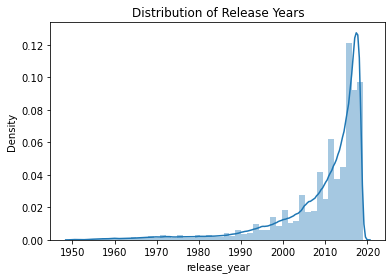

In [20]:
#Plotting distribution of release year
sns.distplot(df.release_year)
plt.title("Distribution of Release Years");
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


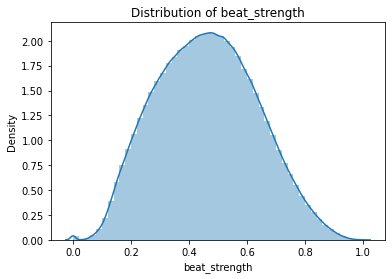

In [75]:
#Plotting distribution of beat_strength
sns.distplot(df.beat_strength)
plt.title("Distribution of beat_strength");
plt.show()

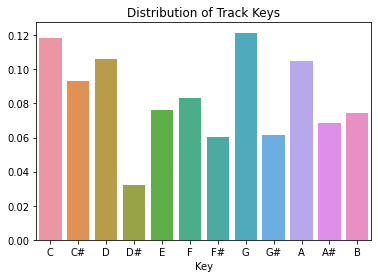

In [21]:
# Key-mappings are from the dataset docs

keys = df.key.value_counts().sort_index()
sns.barplot(
    x=[
        "C",
        "C#",
        "D",
        "D#",
        "E",
        "F",
        "F#",
        "G",
        "G#",
        "A",
        "A#",
        "B"
    ],
    y=keys.values/keys.sum()
)
plt.title("Distribution of Track Keys")
plt.xlabel("Key");

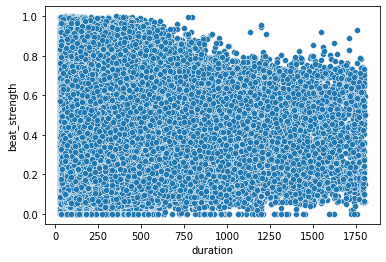

In [64]:
#Scatter plot of duration and beat strength
sns.scatterplot(x='duration', y='beat_strength', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


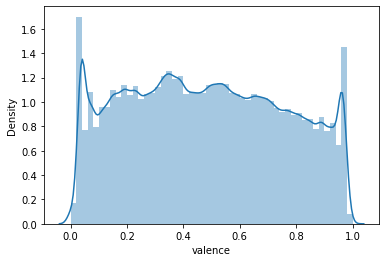

In [67]:
sns.distplot(df['valence'])

In [69]:
#Energy levels
df['energy'].value_counts()
# Maximum energy level
df[df['energy'] == df['energy'].max()]

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
1320640,2017958,795.449402,2011,99.975382,0.23585,0.083996,0.062757,0.297577,3.257239,0.999984,0.197459,0.378145,8,0.947507,-12.938,0.539954,0,0.365559,0.053461,75.200996,5,0.00001,0.418333,-0.264812,-0.400678,0.030994,-0.441035,-0.204932,0.119171,0.237174


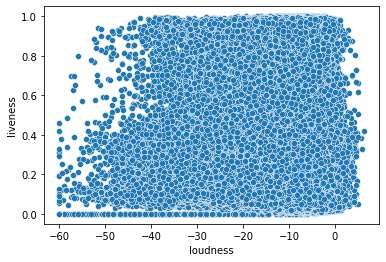

In [22]:
# list of numerical_variables
numerical_features=[feature for feature in df.columns if(df[feature].dtypes!='object')]
print("number of numerical_variables: ",len(numerical_features))

number of numerical_variables:  28


In [23]:
#visualization of numerical variables
df[numerical_features].head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


In [24]:
# 14 discrete features
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variable count:{}".format(len(discrete_features)))

Discrete variable count:2


In [25]:
print(discrete_features)

['key', 'time_signature']


In [26]:
#visualization of categorical dataset
df['mode'].value_counts()

major    2414637
minor    1291751
Name: mode, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


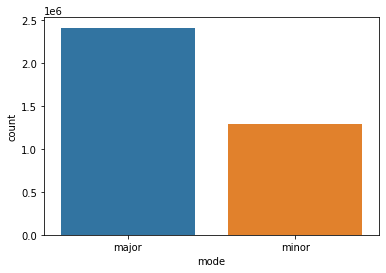

In [27]:
sns.countplot(df['mode'])
plt.show()

In [28]:
#continous feature
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print("continuous feature:{}".format(len(continuous_features)))

continuous feature:26


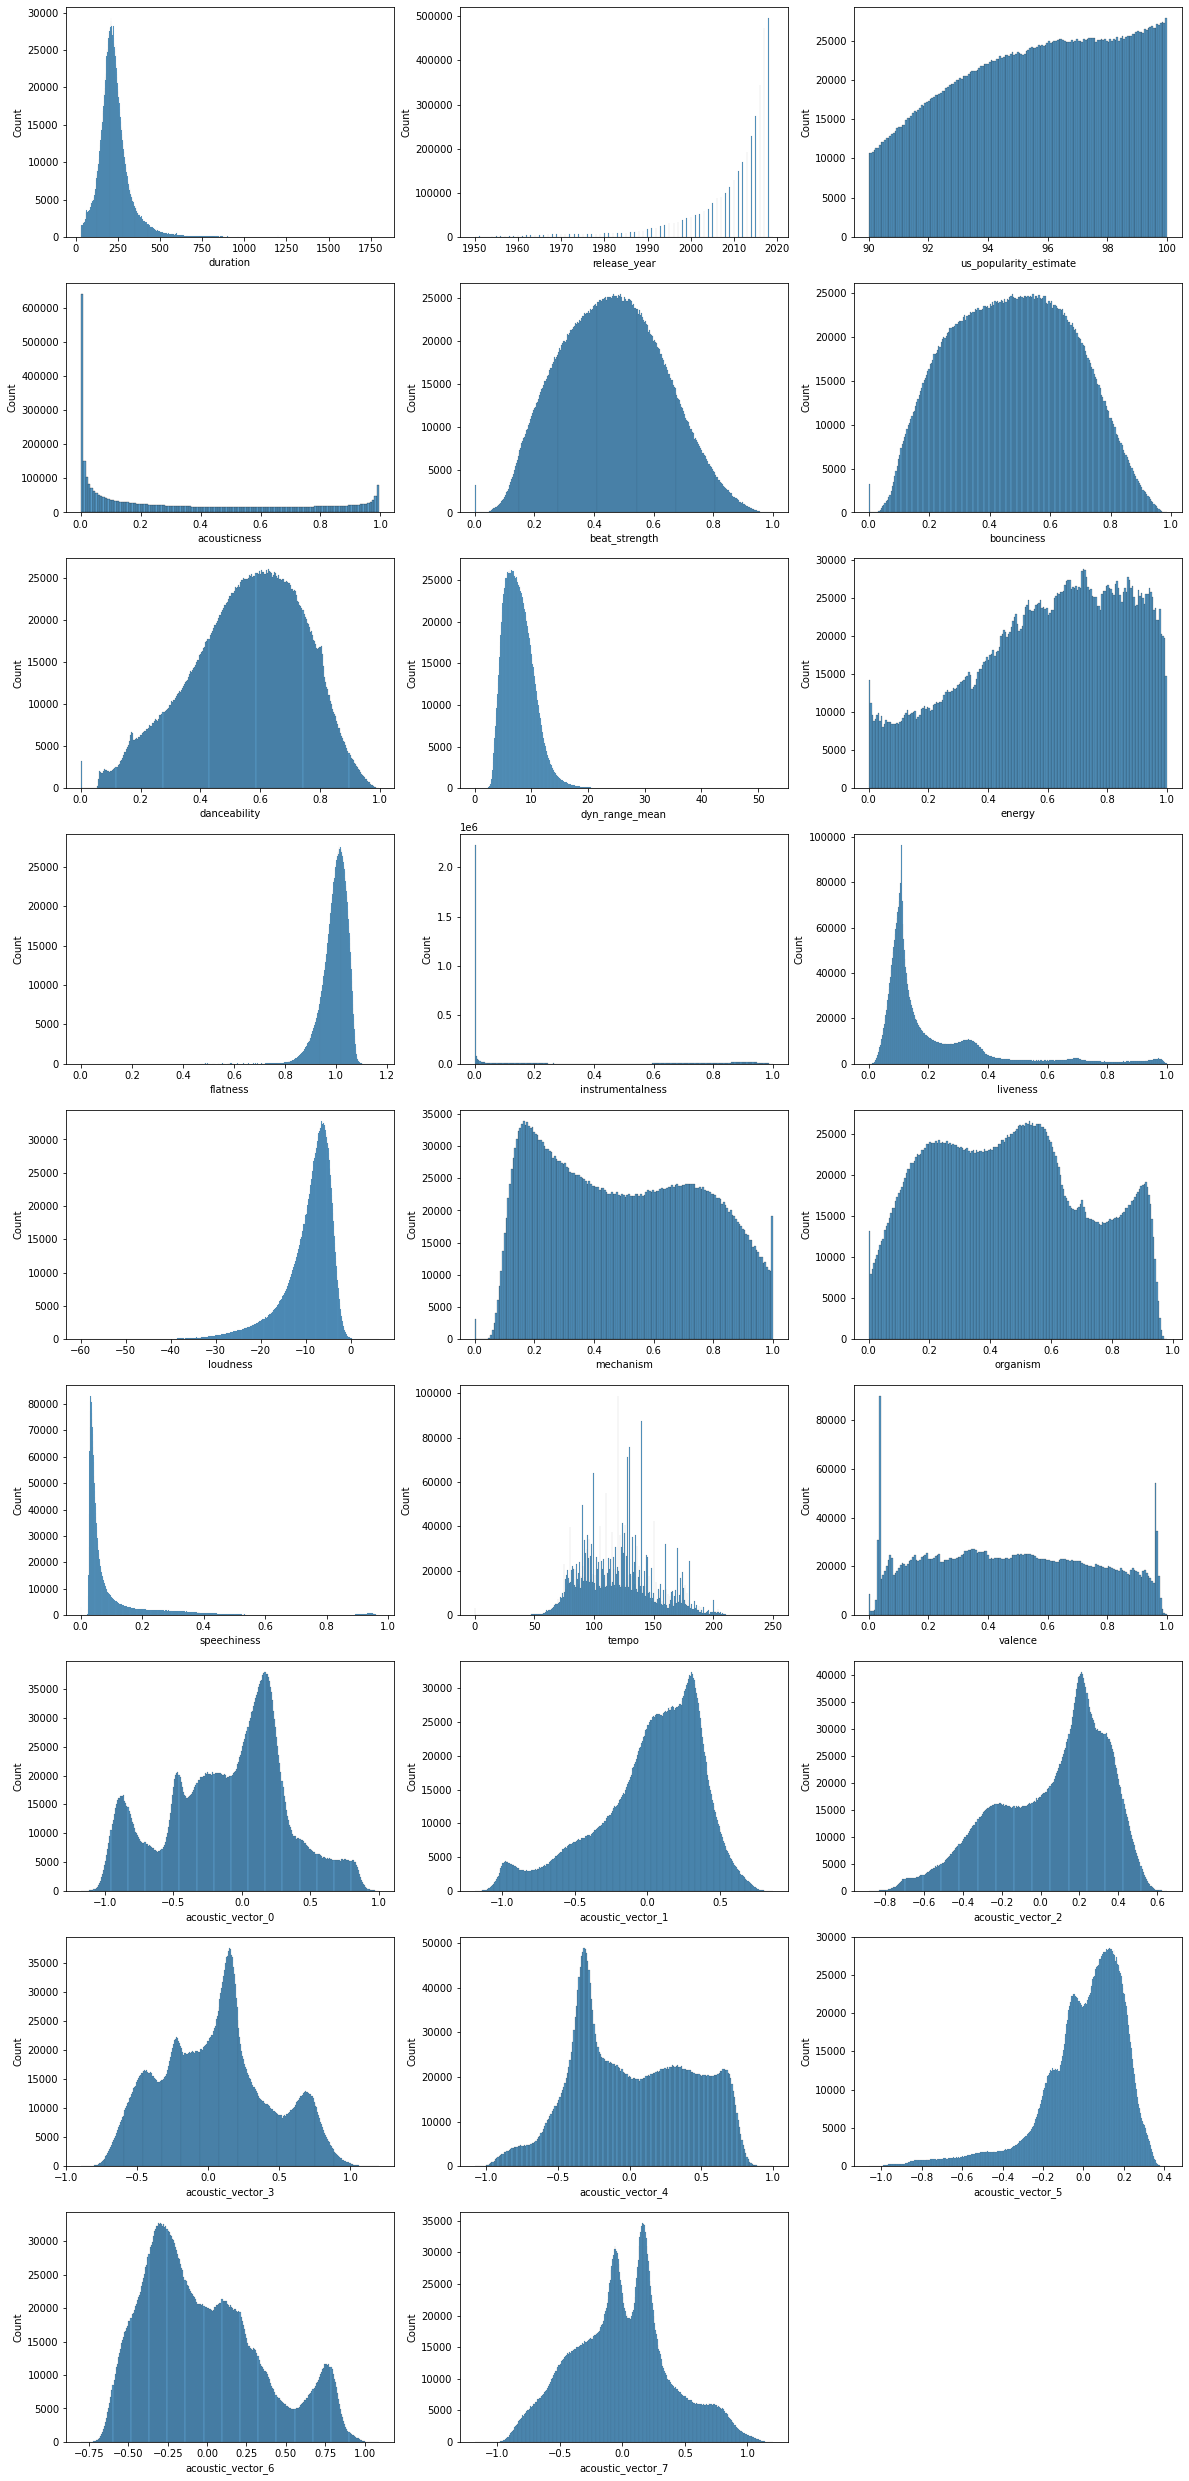

In [29]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

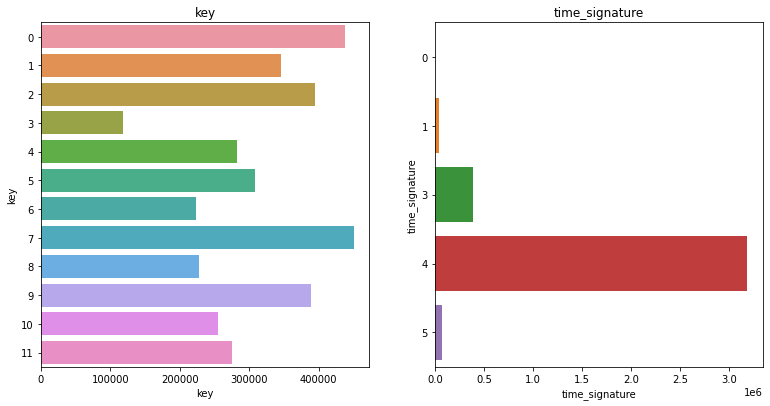

In [30]:
#visulaize discrete data
plt.figure(figsize=(20,90),facecolor="white")
plotnumber=1
for discrete_feature in discrete_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=discrete_feature,data=df)
    plt.xlabel(discrete_feature)
    plt.title(discrete_feature)
    plotnumber+=1
plt.show()

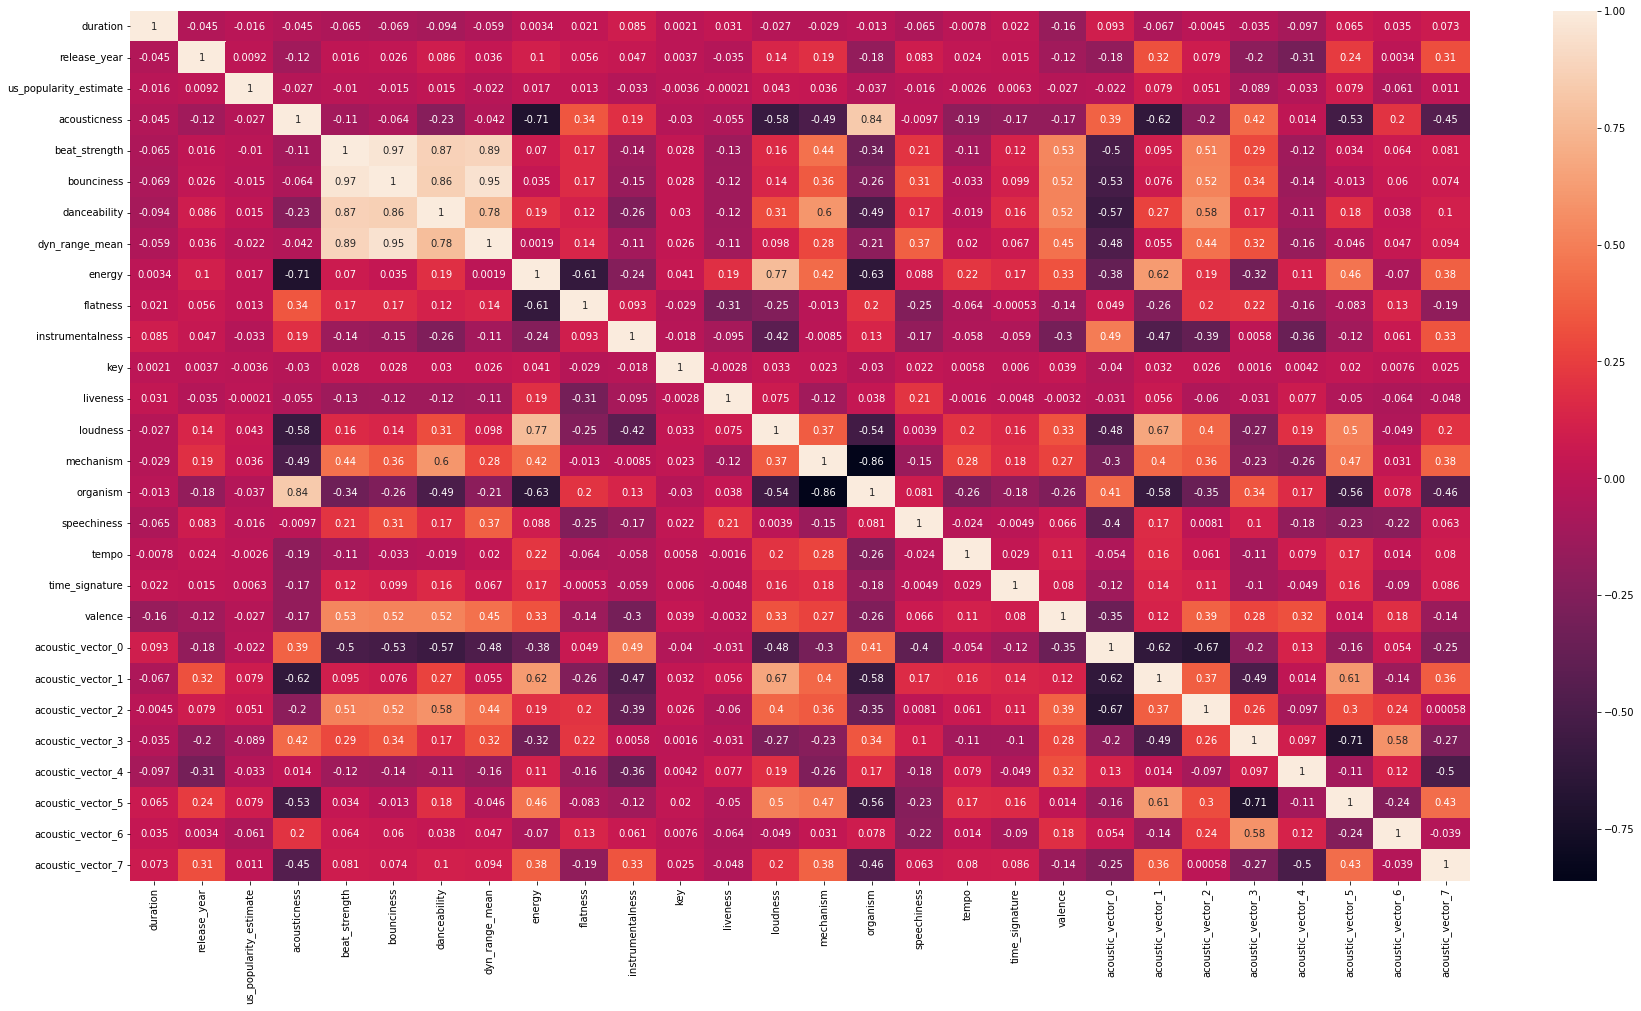

In [31]:
#Explore the correlation between numerical feature
cor=df.corr()
plt.figure(figsize=(30, 16))

sns.heatmap(cor,annot=True)

plt.show()

In [32]:
#transform object value to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["track_id"]=le.fit_transform(df["track_id"])

le1=LabelEncoder()
df['mode']=le1.fit_transform(df['mode'])

In [33]:
df.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,2063485,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,1.054217,2.748115e-07,0,0.096354,-18.855,0.406516,0,0.733656,0.031645,132.020996,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,1472618,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,0.962033,3.822885e-06,0,0.047301,-14.182,0.397906,0,0.461069,0.048545,126.434998,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,1300850,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,1.028740,1.942323e-03,0,0.112578,-13.783,0.376093,0,0.515249,0.027752,87.459999,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,2699143,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,1.009348,5.948958e-01,0,0.254762,-13.531,0.195933,0,0.758640,0.066143,118.060997,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,2185231,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,0.927291,7.619123e-04,0,0.082879,-11.208,0.422735,0,0.408188,0.057926,126.890999,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


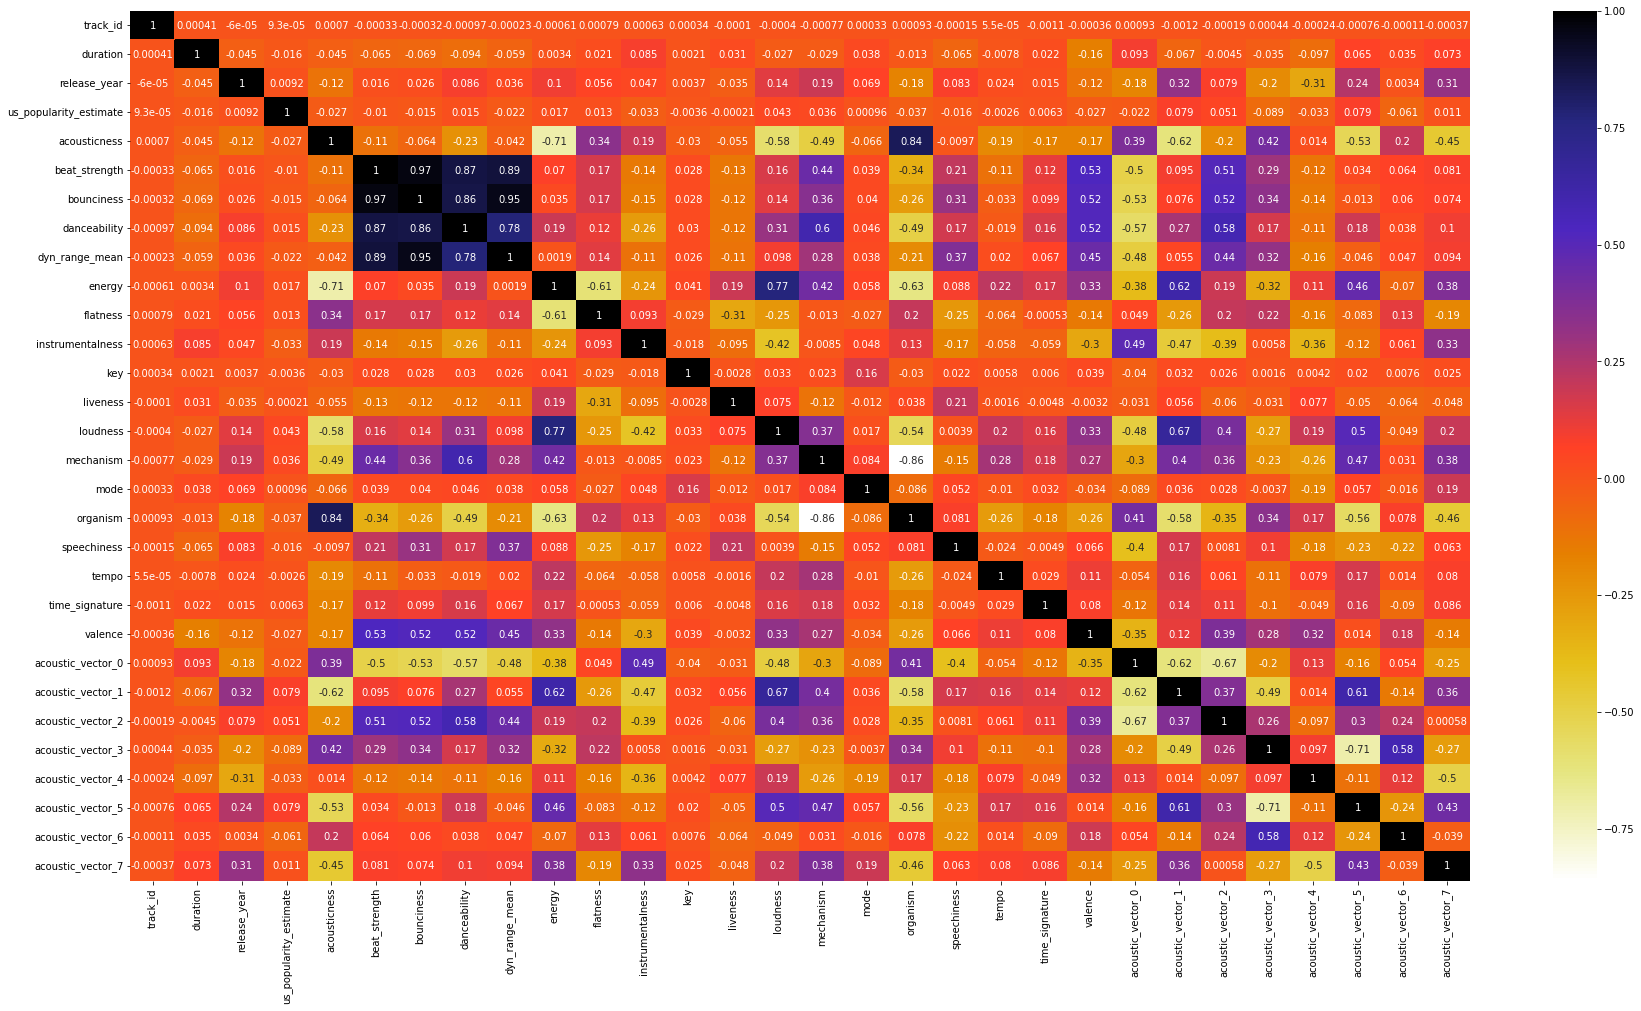

In [34]:
import seaborn as sns
plt.figure(figsize=(30,16))

sns.heatmap(df.corr(),annot=True,cmap = plt.cm.CMRmap_r)
plt.show()

 In this dataset is mostly correlated columns are beat_strength,bounciness,danceability,dyn_range mean, acousticness

In [35]:
#finding x value
X=df.drop(columns=['track_id'])

In [74]:
#Displaying the first 5 rows of x values
X.head(5)

,session_position,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,1,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9999.0,-9999.000000,-9999.000,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
1,2,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,1.0,0.0,180.066666,2018.0,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,0.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,3,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,2.0,0.0,236.796371,2018.0,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,1.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,4,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,0,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,3.0,0.0,231.266663,2018.0,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,0.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
4,5,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,0,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,4.0,0.0,169.826675,2018.0,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,0.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603


In [37]:

#PCA:Apply on features
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(X)

sum(explained_varience)


0.9858242716981983

In [78]:
explained_varience=pca.explained_variance_ratio_
explained_varience

array([9.99949540e-01, 2.46268689e-05])

In [79]:
sum(explained_varience)

0.9999741671067806



1.In this dataset principle component analysis explains nearly 99 percent of the data



**Machine Learning**


In this part we merge the track feature data with training data
in this data set containing167880 rows and 64 columns.

In [38]:
tf_data=pd.read_csv("/content/drive/MyDrive/Track_Features/tf_mini.csv.gz")

In [39]:
tr_data=pd.read_csv("/content/drive/MyDrive/Training_Set/log_mini.csv.gz")

In [40]:
#Track feature data
tf_data.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [41]:
tr_data.head(5)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [42]:
# Using skip_2 as the ground truth
tr_data['skipped'] = (tr_data.skip_2 | tr_data.skip_1).astype('int32')
tr_data = tr_data.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])
tr_data.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0


In [43]:
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [44]:
# Convert the columns to all be consistantly numeric
#transform object value to numerical values
from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df["track_id"]=le.fit_transform(df["track_id"])*/

le1=LabelEncoder()
tf_data['mode']=le1.fit_transform(tf_data['mode'])

In [45]:
tf_data.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,0,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,1,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,0,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,0,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [46]:

# Join the two together
data = (
    tr_data[['session_id','session_position','track_id_clean', 'skipped']]
    .merge(
        tf_data,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
data.head()


,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,0,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,0,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [47]:
full_data = pd.concat((
    data,
    data.drop(columns=['track_id'])\
        .groupby('session_id')\
        .shift(1)\
        .rename(columns={c:f"previous_{c}" for c in data.columns})
), axis=1)
full_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,1.0,0.0,180.066666,2018.0,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,0.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,2.0,0.0,236.796371,2018.0,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,1.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,0,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,3.0,0.0,231.266663,2018.0,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,0.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018,99.998498,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,0,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,4.0,0.0,169.826675,2018.0,99.995038,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,0.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603


In [48]:
#joining table information
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 64 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   skipped                          167880 non-null  int32  
 3   track_id                         167880 non-null  object 
 4   duration                         167880 non-null  float64
 5   release_year                     167880 non-null  int64  
 6   us_popularity_estimate           167880 non-null  float64
 7   acousticness                     167880 non-null  float64
 8   beat_strength                    167880 non-null  float64
 9   bounciness                       167880 non-null  float64
 10  danceability                     167880 non-null  float64
 11  dyn_range_mean                   167880 non-null  float64
 12  en

In [49]:
#Checking null values
data.isnull().sum()

session_id                0
session_position          0
skipped                   0
track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [80]:
full_data.shape

(167880, 64)

In [50]:
#splitting the data
X = full_data.drop(columns=["skipped","session_id","track_id"]).fillna(-9999)
y=full_data.skipped

In [51]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [52]:
#PCA:Apply on features
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(X)

explained_varience=pca.explained_variance_ratio_
sum(explained_varience)

0.9999741671067806

In [53]:
# Apply with logistic regression with PCA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
#Predicted result
y_pred = lg_model.predict(X_test)


In [56]:
#Testing with confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

from sklearn.metrics import accuracy_score,classification_report
lgac=accuracy_score(y_test,y_pred)
print("Logistic Regression accuracy=",lgac)

cr = classification_report(y_test,y_pred)

Logistic Regression accuracy= 0.5309447224207767


In [57]:
print(cr)

              precision    recall  f1-score   support

           0       0.53      0.27      0.36     16215
           1       0.53      0.77      0.63     17361

    accuracy                           0.53     33576
   macro avg       0.53      0.52      0.50     33576
weighted avg       0.53      0.53      0.50     33576



In [58]:
#fitting and training dataset in to random forest model
from sklearn.ensemble import  RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=50,random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [59]:
#prediction of testing dataset
y_pred2=rf_model.predict(X_test)

#Accuracy testing
from sklearn.metrics import accuracy_score
rfac=accuracy_score(y_test,y_pred2)
print("Random forest accuracy=",rfac)

Random forest accuracy= 0.5229330474148202


In [60]:
#Apply XGBOOST with PCA
from xgboost import XGBClassifier
xg_model=XGBClassifier(n_estimators=50)
xg_model.fit(X_train,y_train)

y_pred6=xg_model.predict(X_test)

xgacc=accuracy_score(y_test,y_pred6)
print("XGboost algorithm accuracy=",xgacc)

XGboost algorithm accuracy= 0.5335358589468668


In [61]:
#Apply XGBOOST with out PCA


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)
from xgboost import XGBClassifier
xg_model=XGBClassifier(n_estimators=50)
xg_model.fit(X_train,y_train)

y_pred7=xg_model.predict(X_test)

xgac=accuracy_score(y_test,y_pred7)
print("XGboost algorithm accuracy=",xgac)

XGboost algorithm accuracy= 0.7247438646652371


##Conclusion

 This data set consist of 37,57,092 rows and 30 columns, first I checked information about the data, then visualized using below features.
* Categorical feature
* Numerical feature
* Discrete feature. 

Visualize  the dataset using correlation plot. Applying Principal component analysis and getting 99% result. Later the mini data is merged with training data and 'skipped' is selected as target variable. PCA is applying and PCA with Logistic regression, random forest and XGboost is applyed.







 